# Import Library

In [1]:
import pandas as pd
import numpy as np

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# ga perlu plt.show()
matplotlib.style.use('ggplot') # tema visualisasi kayak di R

# Import Dataset

In [3]:
data = pd.read_csv('HR_comma_sep.csv')

# Quick Look

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Descriptive Statistics

In [7]:
data.select_dtypes('number').describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.select_dtypes('object').describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [9]:
data['time_spend_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

### Histogram

**Skew ke kanan** karena Mean > Median

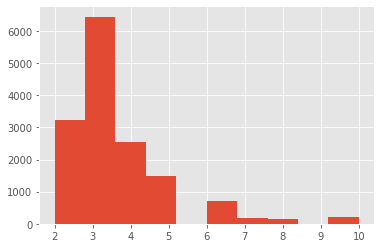

In [7]:
plt.hist(data['time_spend_company'])
plt.show()

In [10]:
x = data['time_spend_company']

#### Measure of Central Tendency

#### Mean Median

In [11]:
print('rata-rata: ',x.mean())
print('median: ',x.median())

rata-rata:  3.498233215547703
median:  3.0


#### Modus

In [9]:
print('modus: ',x.mode()[0])

modus:  3


#### Percentile

In [13]:
### Cara pertama
data['time_spend_company'].quantile(0.9)

5.0

In [14]:
### Cara kedua
np.quantile(data['time_spend_company'],0.9)

5.0

In [15]:
### Cara ketiga
np.percentile(data['time_spend_company'],90)

5.0

#### Quartile

#### Q1

In [16]:
data['time_spend_company'].quantile(0.25)

3.0

#### Q2

In [17]:
data['time_spend_company'].quantile(0.5)

3.0

#### Q3

In [18]:
data['time_spend_company'].quantile(0.75)

4.0

#### Measure of Spread

#### Variance

In [19]:
x.var()

2.1319978117222864

#### Standard Deviation

In [20]:
### Cara pertama
np.sqrt(x.var())

1.4601362305354546

In [19]:
### Cara kedua
x.std()

1.4601362305354546

#### InterQuartileRange (IQR)

In [21]:
print('Inter Quartile Range (IQR):',x.quantile(0.75)-x.quantile(0.25))

Inter Quartile Range (IQR): 1.0


#### Range

In [22]:
print('Range:',x.max()-x.min())

Range: 8


# Vertical Boxplot

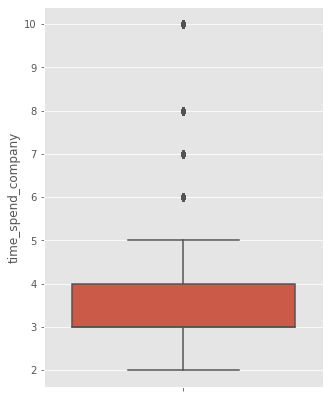

In [23]:
plt.figure(figsize = (5,7))
sns.boxplot(y='time_spend_company',data = data)
plt.show()

# Horizontal Boxplot

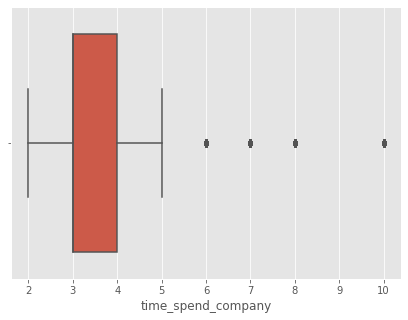

In [29]:
plt.figure(figsize = (7,5))
sns.boxplot(x='time_spend_company',data = data)
plt.show()

### Additional Code

In [24]:
### Menggunakan metode grouping (groupby)
data.groupby(['left'])['time_spend_company'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0


In [16]:
### Menggunakan metode grouping (groupby)
data.groupby(['salary'])['time_spend_company'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
high,1237.0,3.692805,1.977885,2.0,3.0,3.0,4.0,10.0
low,7316.0,3.438218,1.303818,2.0,3.0,3.0,4.0,10.0
medium,6446.0,3.529010,1.506442,2.0,3.0,3.0,4.0,10.0
